# Mastering the Process of Data Science 2020/21

#### 1st Notebook

#### Abduvosid Malikov

This is the assignment for Mastering the Process of Data Science course. The goal of the assignment is to work with 3 datasets and to draw conclusions based on the insights.

In [1]:
import pandas as pd
import numpy as np

Drinks.csv: number of alcohol servings per capita per year for 15 years of age or older (for beer, wine and spirit) across various countries

In [2]:
drinks = pd.read_csv('data/Drinks.csv')

### Data Preparation

#### Drinks dataset

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN


In drinks dataset, there are 193 rows and 5 columns

##### Duplicates

In [4]:
drinks.shape 

(193, 5)

In [5]:
drinks.drop_duplicates().shape

(193, 5)

There is no duplicates in the dataset

##### Missing values

In [6]:
drinks.isna().sum()

country                           0
beer_servings                     0
spirit_servings                   0
wine_servings                     0
total_litres_of_pure_alcohol    193
dtype: int64

isna() shows that there are no missing values in all 4 columns. Only total_litres_of_pure_alcohol column is empty - filled with NaNs.

In [7]:
drinks.dtypes

country                          object
beer_servings                    object
spirit_servings                  object
wine_servings                    object
total_litres_of_pure_alcohol    float64
dtype: object

Even though beer_servings, spirit_servings, and wine_servings columns shows numbers, Pandas assigned the data type of object (string) to these columns when reading CSV file. This indeed looks strange. 

So let's check whether all rows in these columns are numeric - contains numbers

In [8]:
beer_non_n = drinks['beer_servings'].str.isnumeric()

In [9]:
beer_non_n.value_counts() 

True     192
False      1
Name: beer_servings, dtype: int64

The answer is No: one row has non-numeric value for the column *beer_servings*

The question is: which row?

In [10]:
beer_non_n[beer_non_n == False].index

Int64Index([99], dtype='int64')

The answer is 99th row

In [11]:
drinks.loc[99:99, ] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
99,Macedonia,?,27,86,NaN


Indeed there is a question mark (string) in 99th row instead of number. Seems we have missing value for Macedonia. We handle this missing value by imputing 0. 

In [12]:
drinks.at[99, 'beer_servings'] = 0

In [13]:
drinks.loc[99:99, ] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
99,Macedonia,0,27,86,NaN


In [14]:
spirit_non_n = drinks['spirit_servings'].str.isnumeric()

In [15]:
spirit_non_n.value_counts() 

True     192
False      1
Name: spirit_servings, dtype: int64

The same is in spirit_servings column

In [16]:
spirit_non_n[spirit_non_n == False].index

Int64Index([46], dtype='int64')

46th row has non-numeric value for the column spirit_servings

In [17]:
drinks.loc[46:46, ] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
46,Denmark,224,?,278,NaN


We have missing value for Denmark. We handle this missing value by imputing 0.

In [18]:
drinks.at[46, 'spirit_servings'] = 0

In [19]:
drinks.loc[46:46, ] 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
46,Denmark,224,0,278,NaN


In [20]:
wine_non_n = drinks['wine_servings'].str.isnumeric()

In [21]:
wine_non_n[wine_non_n == False].index

Int64Index([11], dtype='int64')

11th row has non-numeric value for the column wine_servings

In [22]:
drinks.loc[11, ] 

country                         Bahamas
beer_servings                       122
spirit_servings                     176
wine_servings                         ?
total_litres_of_pure_alcohol        NaN
Name: 11, dtype: object

We have missing value for Bahamas. We handle this missing value by imputing 0.

In [23]:
drinks.at[11, 'wine_servings'] = 0

In [24]:
drinks.loc[11, ] 

country                         Bahamas
beer_servings                       122
spirit_servings                     176
wine_servings                         0
total_litres_of_pure_alcohol        NaN
Name: 11, dtype: object

beer_servings, spirit_servings, and wine_servings columns shows numbers. However, their data data type is object (string). In order to simplify further data manipulation and make them available for calculation, let's convert them to approapriate number data type. 

In [25]:
drinks["beer_servings"] = pd.to_numeric(drinks.beer_servings, errors='coerce')

In [26]:
drinks["spirit_servings"] = pd.to_numeric(drinks.spirit_servings, errors='coerce')

In [27]:
drinks["wine_servings"] = pd.to_numeric(drinks.wine_servings, errors='coerce')

In [28]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

Now all 3 columns have proper data type

##### Distribution

Now let's see the statistics on numeric columns. 

In [29]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,0.0
mean,105.611399,80.575130,49.186528,NaN
std,101.431367,88.476608,79.776944,NaN
min,0.000000,0.000000,0.000000,NaN
25%,20.000000,4.000000,1.000000,NaN
50%,71.000000,55.000000,8.000000,NaN
75%,188.000000,128.000000,59.000000,NaN
max,376.000000,438.000000,370.000000,NaN


We can see that across various countries number of beer servings per capita per year varies from 0 to 376, spirit servings varies from 0 to 438, and wine servings varies from 0 to 370. 

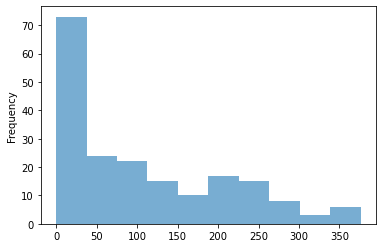

In [30]:
ax = drinks['beer_servings'].plot.hist(alpha=0.6) 

Histogram is skewed to the right. It indicates that most of the countries have beer servings of 0 to 200 and few countries had more than that. 

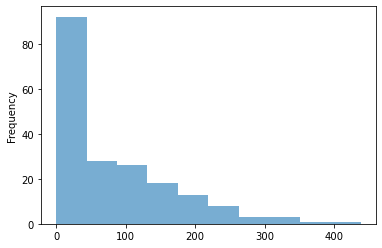

In [31]:
ax = drinks['spirit_servings'].plot.hist(alpha=0.6) 

Histogram indicates that most of the countries have spirit servings of 0 to 200 and few countries had more than that. 

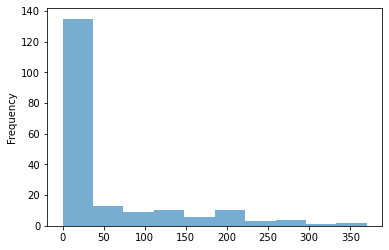

In [32]:
ax = drinks['wine_servings'].plot.hist(alpha=0.6) 

Histogram indicates that most of the countries have wine servings of 0 to 100 and few countries had more than that.

#### Calculation

Calculate total liters of pure alcohol using the following information:

    1 ounce = 0.0295 l
    Beer serving: 12 ounces, 5% alcohol
    Wine serving: 5 ounces, 12% alcohol
    Spirit serving: 1.5 ounces 40% alcohol

##### Calculation logic

1 serving of beer is equal to 12 ounces. 

12 ounces (1 serving) of beer contains 5 % alcohol. 

12 ounces of beer is equal to 0.354 litres (12*0.0295)

In [33]:
beer_oz_to_l = 12*0.0295
beer_oz_to_l

0.354

In [34]:
wine_oz_to_l = 5*0.0295
wine_oz_to_l

0.1475

In [35]:
spirit_oz_to_l = 1.5*0.0295
spirit_oz_to_l

0.04425

1 serving of beer contains 5 % alcohol, that means 

1 serving of beer contains 0.0177 litres of alcohol (5*0.354/100).

In [36]:
alcohol_in_beer = 5*beer_oz_to_l/100
alcohol_in_beer

0.0177

89 servings of beer contains 1.5753 litres of alcohol (89*0.0177)

In [37]:
round(89*alcohol_in_beer, 4)

1.5753

In [38]:
alcohol_in_wine = 12*wine_oz_to_l/100
alcohol_in_wine

0.0177

In [39]:
round(132*alcohol_in_wine, 4)

2.3364

In [40]:
alcohol_in_spirit = 40*spirit_oz_to_l/100
alcohol_in_spirit

0.0177

In [41]:
round(54*alcohol_in_spirit, 4)

0.9558

We calculate the total liters of alcohol consumed in a country and assign it to the variable

In [42]:
total_litres_calculation = round(drinks['beer_servings']*alcohol_in_beer, 4) + round(drinks['spirit_servings']*alcohol_in_spirit, 4) + round(drinks['wine_servings']*alcohol_in_wine, 4)

This variable helps us to get our column

In [43]:
drinks['total_litres_of_pure_alcohol'] = total_litres_calculation 

In [47]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0000
1,Albania,89,132,54,4.8675
2,Algeria,25,0,14,0.6903
3,Andorra,245,138,312,12.3015
4,Angola,217,57,45,5.6463


Save dataframe with imputed and calculated values

In [45]:
drinks.to_csv('data/Drinks_processed.csv', index=False)